In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Found CSV files: ['channel_0.csv', 'channel_1.csv', 'channel_2.csv', 'channel_3.csv', 'channel_4.csv', 'channel_5.csv', 'channel_6.csv', 'channel_7.csv', 'channel_8.csv', 'channel_9.csv', 'channel_10.csv', 'channel_11.csv', 'channel_12.csv', 'channel_13.csv', 'channel_14.csv', 'channel_15.csv', 'channel_16.csv', 'channel_17.csv', 'channel_18.csv', 'channel_19.csv', 'channel_20.csv', 'channel_21.csv', 'channel_22.csv']


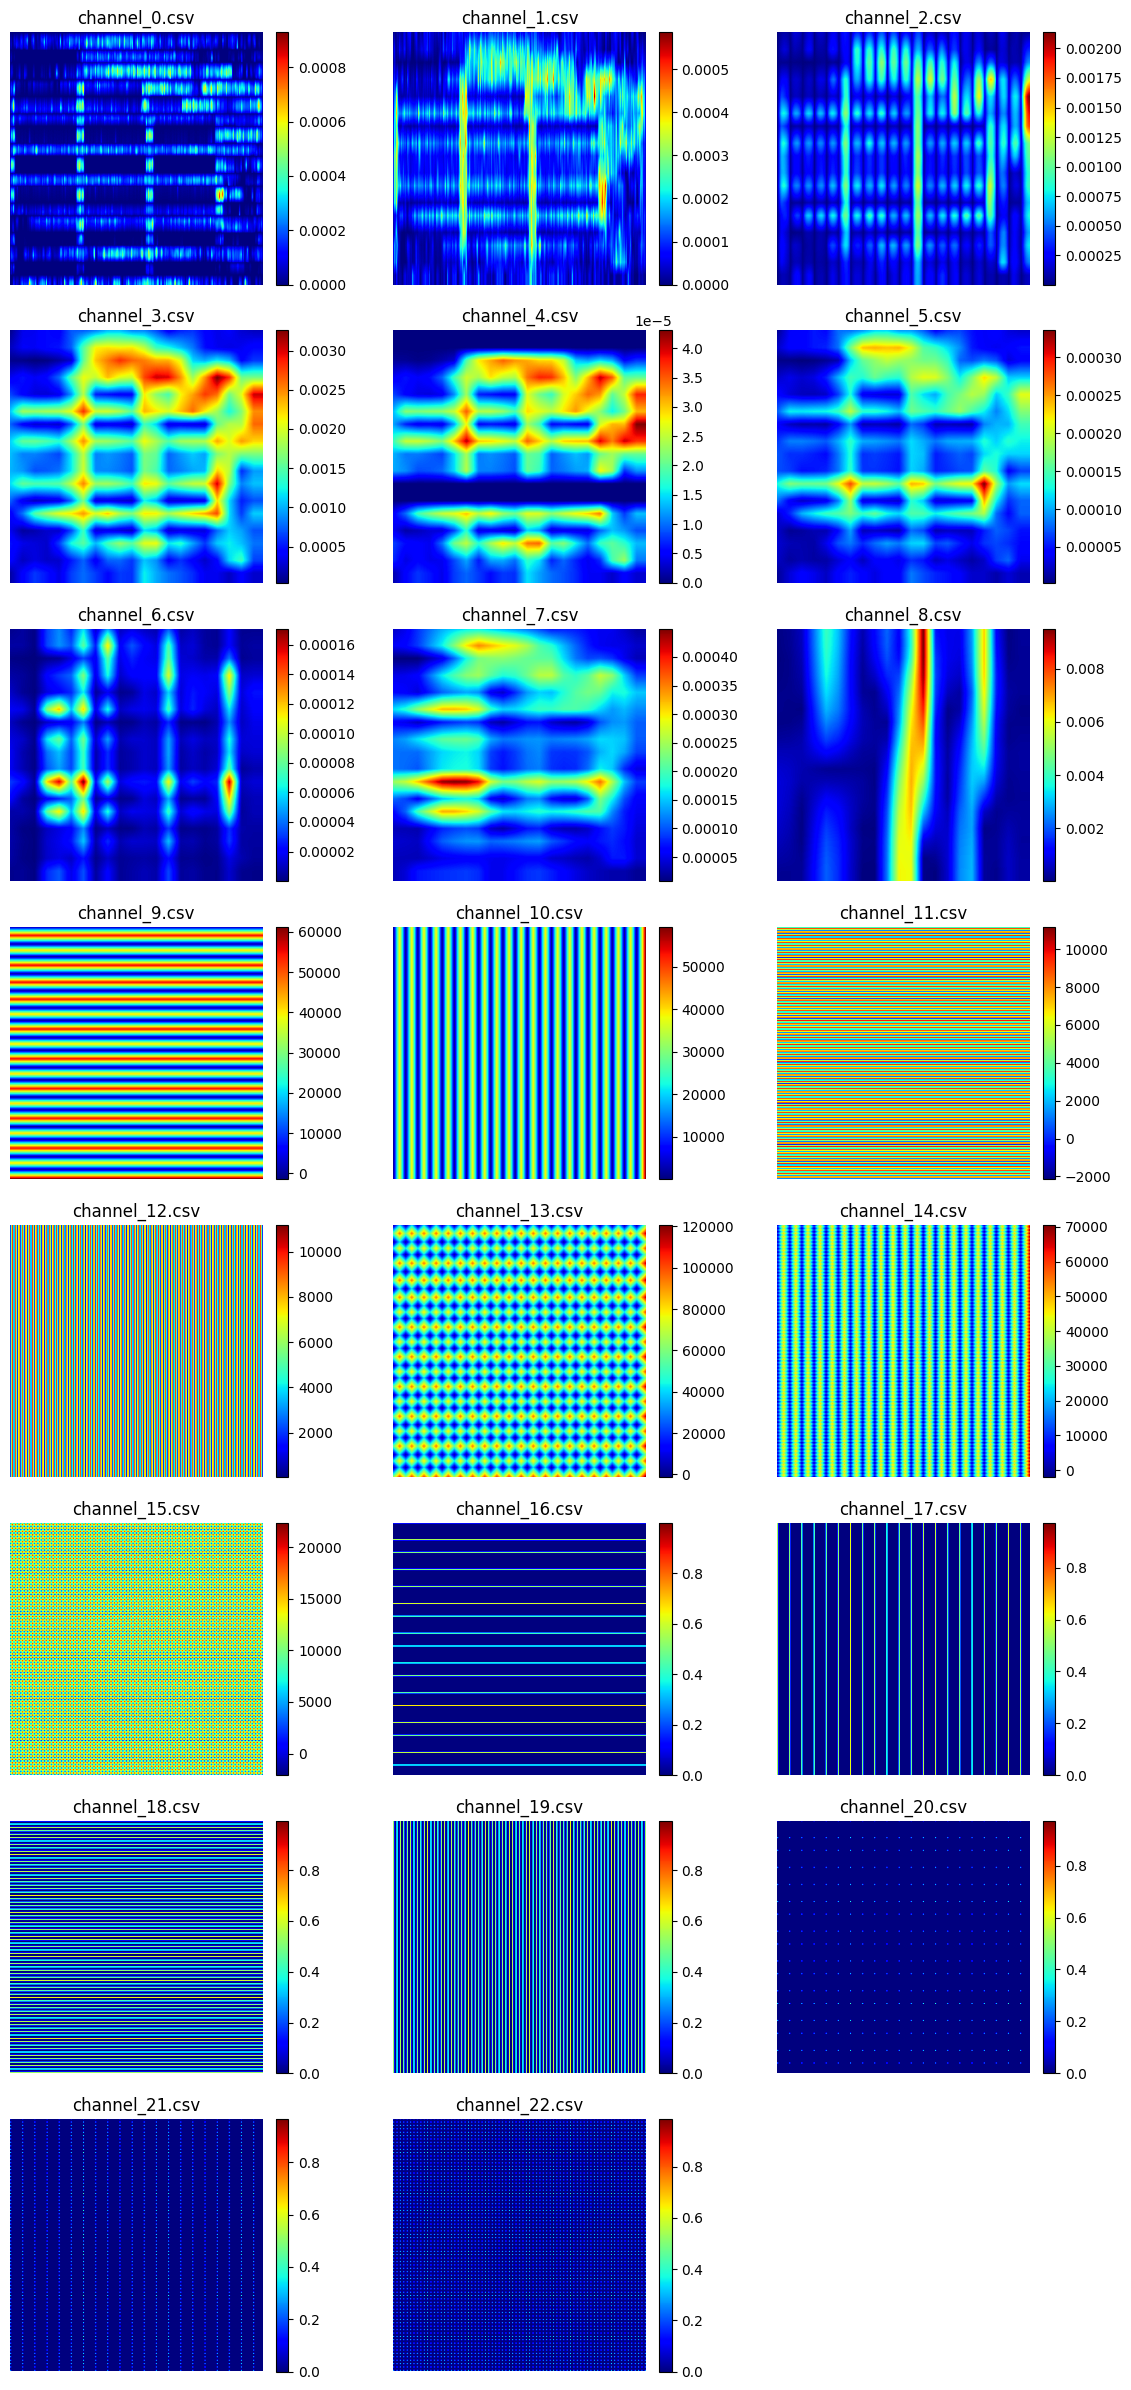

In [6]:
# csv load and plot
def load_csv(path):
    img = pd.read_csv(path, header=None).to_numpy() # H,W
    return img
def plot_img(img, title=""):
    plt.imshow(img, cmap='jet')
    plt.colorbar()
    plt.title(title)
    plt.show()
    plt.clf()
# imgs path 입력시 자동으로 plot (subplot), col은 사용자 지정, row는 자동계산
def plot_imgs(imgs, col=3, titles=None):
    row = (len(imgs)-1)//col + 1
    fig, axes = plt.subplots(row, col, figsize=(4*col, 3*row))
    for i, img in enumerate(imgs):
        r = i // col
        c = i % col
        ax = axes[r, c] if row > 1 else axes[c]
        im = ax.imshow(img, cmap='jet')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        if titles is not None:
            ax.set_title(titles[i])
        ax.axis('off')
    for j in range(i+1, row*col):
        r = j // col
        c = j % col
        ax = axes[r, c] if row > 1 else axes[c]
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    path = "./dump"
    files = os.listdir(path)
    files = [f for f in files if f.endswith(".csv")]
    # channel_{idx}에서 idx 숫자 순서대로 정렬
    files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    print("Found CSV files:", files)
    imgs = [load_csv(os.path.join(path, f)) for f in files]
    plot_imgs(imgs, col=3, titles=files)  

main()

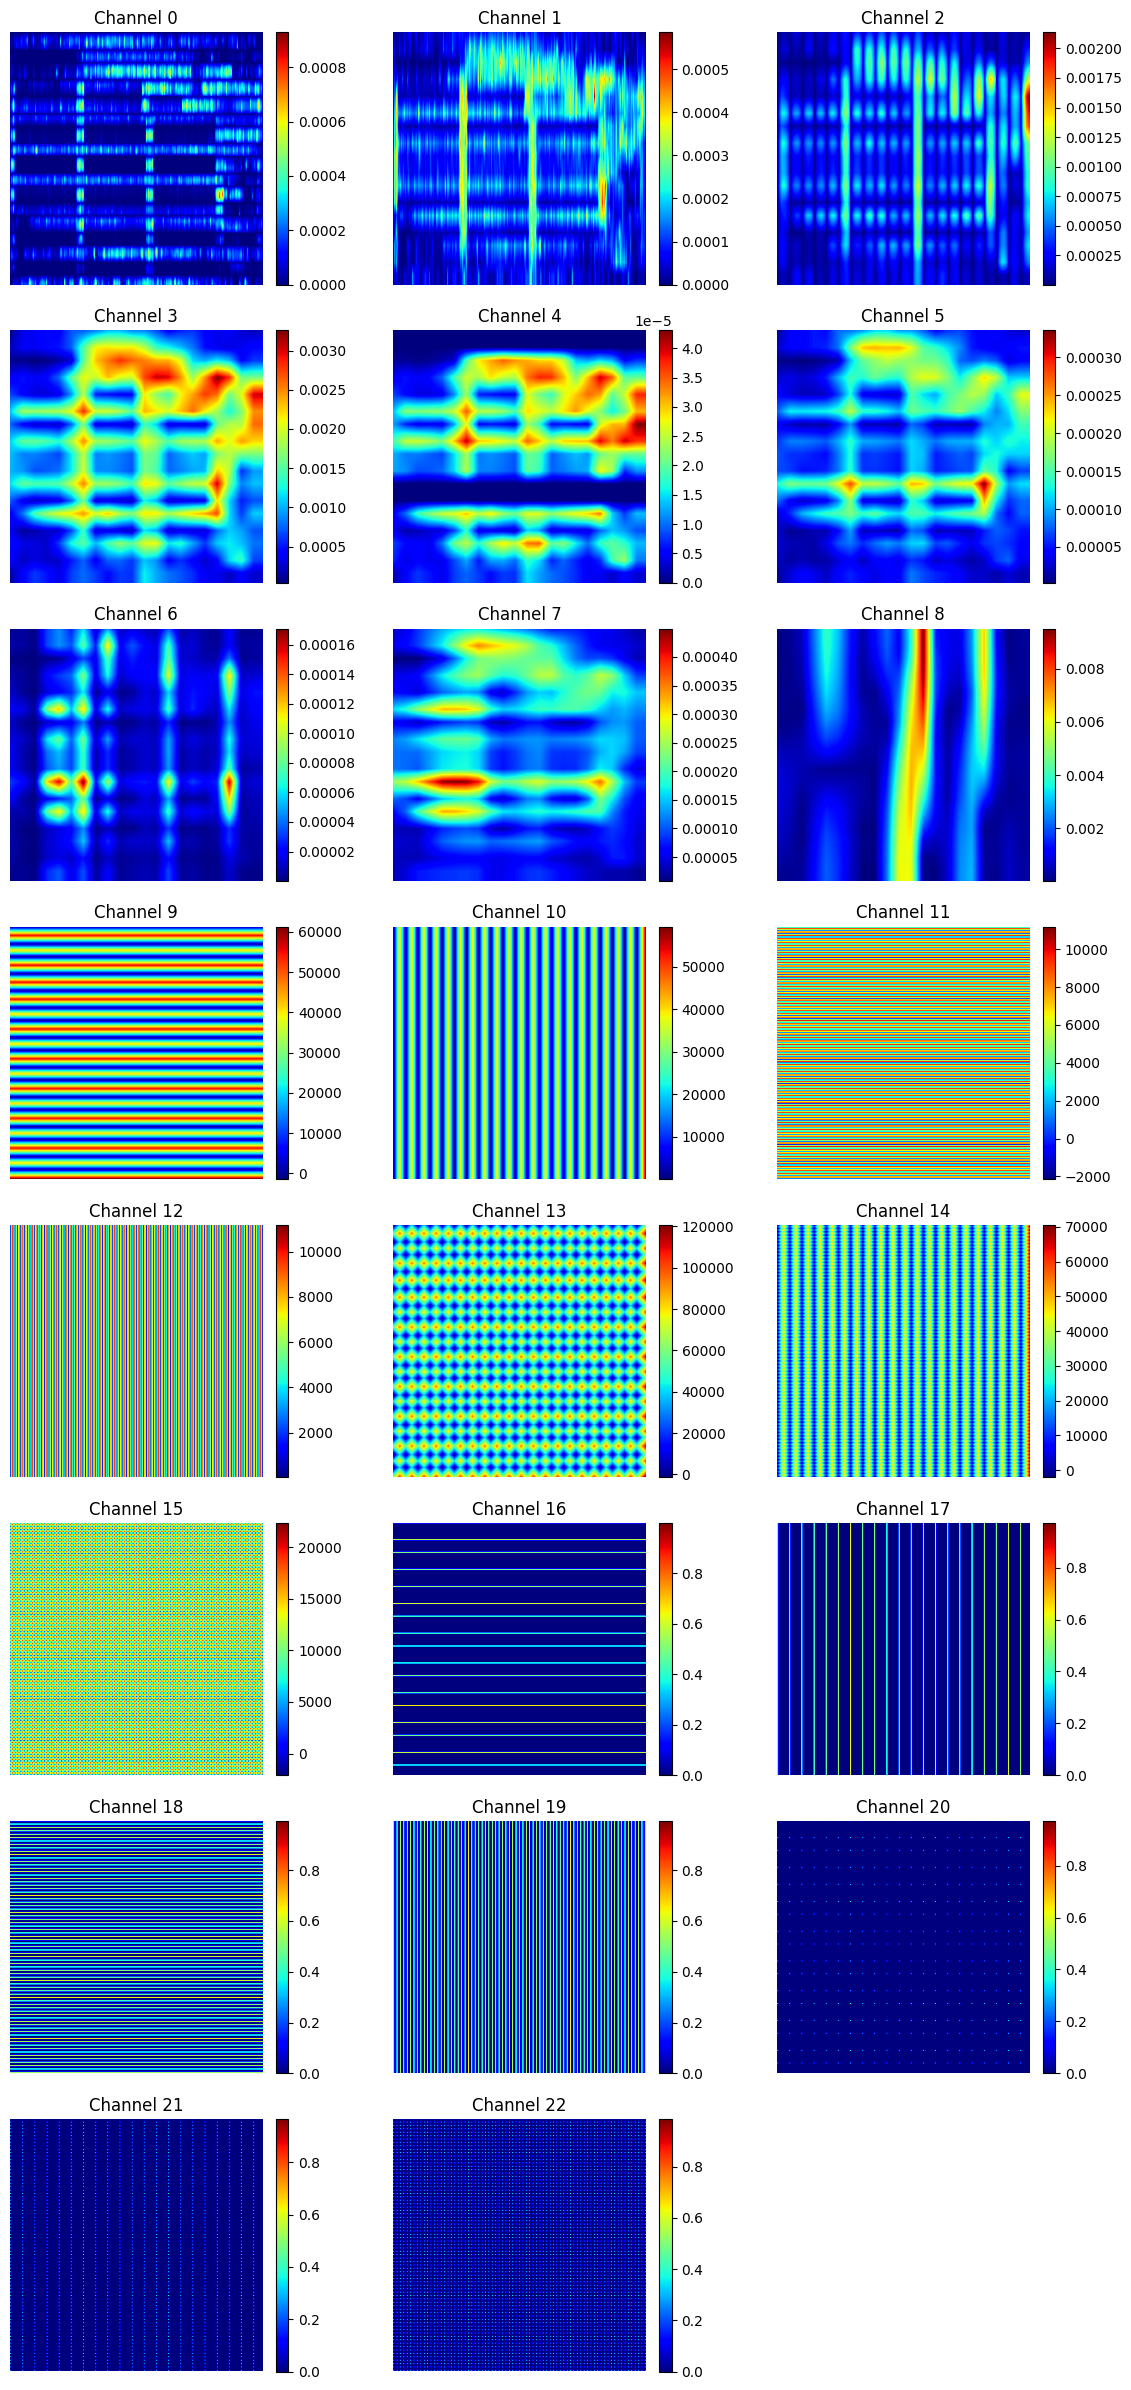

In [7]:
# 기존 저장했던 npy 파일과 비교
# /data/ICCAD_2023/hidden-real-circuit-data/testcase10/extra_data/hird/testcase10_hird.npy (C,H,W)
import numpy as np
def load_npy(path):
    data = np.load(path) # (C,H,W)
    return data
def plot_npy(data, col=3):
    C, H, W = data.shape
    row = (C-1)//col + 1
    fig, axes = plt.subplots(row, col, figsize=(4*col, 3*row))
    for i in range(C):
        r = i // col
        c = i % col
        ax = axes[r, c] if row > 1 else axes[c]
        im = ax.imshow(data[i], cmap='jet')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        ax.set_title(f"Channel {i}")
        ax.axis('off')
    for j in range(i+1, row*col):
        r = j // col
        c = j % col
        ax = axes[r, c] if row > 1 else axes[c]
        ax.axis('off')
    plt.tight_layout()
    plt.show()
npy_path = "/data/ICCAD_2023/hidden-real-circuit-data/testcase10/extra_data/hird/testcase10_hird.npy"
data = load_npy(npy_path)
plot_npy(data, col=3)